In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm # progress bar
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

%matplotlib inline

2022-07-17 17:03:06.266984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-17 17:03:06.267088: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
labels_df = pd.read_csv('labels.csv')
labels_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
# No. of unique dog breeds in dataset
labels_df['breed'].nunique()

120

In [4]:
breed_counts = labels_df['breed'].value_counts()
breed_counts[breed_counts >= 100]

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
airedale                107
tibetan_terrier         107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
australian_terrier      102
blenheim_spaniel        102
miniature_pinscher      102
irish_wolfhound         101
Name: breed, dtype: int64

In [5]:
breeds = ['scottish_deerhound',
          'maltese_dog',
          'beagle']
breeds

['scottish_deerhound', 'maltese_dog', 'beagle']

In [6]:
labels = labels_df[(labels_df['breed'].isin(breeds))].reset_index()

labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,161,03dc61595ad9dbf49e3998cf586ca8cb,scottish_deerhound


In [7]:
# Create numpy array with zeroes

X = np.zeros((len(labels), 200, 200, 3), dtype='float32')

In [8]:
# One-hot Encoding

y = label_binarize(labels['breed'], classes = breeds)

In [9]:
#Converting Images to numpy array & Normalize 

for i in tqdm(range(len(labels))):
  img = image.load_img('dataset/train/%s.jpg' % labels['id'][i], target_size=(200,200,3))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(),axis=0)
  X[i] = x / 255.0

100%|██████████| 348/348 [00:01<00:00, 209.60it/s]


In [10]:
X.shape, y.shape

((348, 200, 200, 3), (348, 3))

In [11]:
# Building the Model

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(5,5),activation='relu', input_shape=(200,200,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(7,7),activation='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8, kernel_size=(5,5),activation='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer = 'l2'))
model.add(Dense(64, activation='relu', kernel_regularizer = 'l2'))
model.add(Dense(len(breeds), activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics = ['accuracy'])

2022-07-17 17:03:13.216269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 17:03:13.217007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-17 17:03:13.217277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-17 17:03:13.217474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-17 17:03:13.217640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 16)       0

In [13]:
# Split the dataset into train, test and Val

X_df, X_test, y_df, y_test = train_test_split(X, y,test_size= 0.1)

X_train, X_val, y_train, y_val = train_test_split(X, y,test_size= 0.2)

In [15]:
# Training the Model

history = model.fit(X_train, y_train, batch_size=128, epochs=80, validation_data=(X_val, y_val))

Epoch 1/80
3/3 [==============================] - 24s 6s/step - loss: 4.7070 - accuracy: 0.3921 - val_loss: 4.6850 - val_accuracy: 0.3714
Epoch 2/80
3/3 [==============================] - 21s 6s/step - loss: 4.6748 - accuracy: 0.3813 - val_loss: 4.6535 - val_accuracy: 0.3571
Epoch 3/80
3/3 [==============================] - 20s 6s/step - loss: 4.6425 - accuracy: 0.3885 - val_loss: 4.6224 - val_accuracy: 0.3714
Epoch 4/80
3/3 [==============================] - 20s 6s/step - loss: 4.6107 - accuracy: 0.3921 - val_loss: 4.5930 - val_accuracy: 0.3714
Epoch 5/80
3/3 [==============================] - 19s 5s/step - loss: 4.5791 - accuracy: 0.3921 - val_loss: 4.5620 - val_accuracy: 0.3714
Epoch 6/80
3/3 [==============================] - 20s 5s/step - loss: 4.5461 - accuracy: 0.3957 - val_loss: 4.5285 - val_accuracy: 0.3714
Epoch 7/80
3/3 [==============================] - 19s 6s/step - loss: 4.5126 - accuracy: 0.3921 - val_loss: 4.4945 - val_accuracy: 0.3571
Epoch 8/80
3/3 [==================

In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
3/3 [==============================] - 22s 6s/step - loss: 2.8424 - accuracy: 0.8129 - val_loss: 2.9428 - val_accuracy: 0.7286
Epoch 2/30
3/3 [==============================] - 20s 6s/step - loss: 2.8123 - accuracy: 0.8201 - val_loss: 2.9308 - val_accuracy: 0.6857
Epoch 3/30
3/3 [==============================] - 23s 7s/step - loss: 2.7867 - accuracy: 0.8201 - val_loss: 2.9482 - val_accuracy: 0.7143
Epoch 4/30
3/3 [==============================] - 23s 6s/step - loss: 2.7963 - accuracy: 0.8058 - val_loss: 2.8894 - val_accuracy: 0.7571
Epoch 5/30
3/3 [==============================] - 22s 6s/step - loss: 2.7510 - accuracy: 0.8345 - val_loss: 2.8878 - val_accuracy: 0.7571
Epoch 6/30
3/3 [==============================] - 22s 6s/step - loss: 2.7410 - accuracy: 0.8201 - val_loss: 2.8891 - val_accuracy: 0.7429
Epoch 7/30
3/3 [==============================] - 23s 6s/step - loss: 2.7349 - accuracy: 0.8381 - val_loss: 2.9006 - val_accuracy: 0.7143
Epoch 8/30
3/3 [==================

In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
3/3 [==============================] - 22s 6s/step - loss: 2.4570 - accuracy: 0.8525 - val_loss: 2.7425 - val_accuracy: 0.7000
Epoch 2/30
3/3 [==============================] - 22s 6s/step - loss: 2.4332 - accuracy: 0.8561 - val_loss: 2.7159 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 22s 6s/step - loss: 2.4347 - accuracy: 0.8777 - val_loss: 2.7204 - val_accuracy: 0.7714
Epoch 4/30
3/3 [==============================] - 20s 5s/step - loss: 2.4116 - accuracy: 0.8957 - val_loss: 2.7170 - val_accuracy: 0.7000
Epoch 5/30
3/3 [==============================] - 19s 5s/step - loss: 2.3980 - accuracy: 0.8633 - val_loss: 2.7197 - val_accuracy: 0.7429
Epoch 6/30
3/3 [==============================] - 21s 6s/step - loss: 2.3865 - accuracy: 0.8705 - val_loss: 2.6951 - val_accuracy: 0.7429
Epoch 7/30
3/3 [==============================] - 22s 6s/step - loss: 2.3782 - accuracy: 0.8993 - val_loss: 2.6784 - val_accuracy: 0.7571
Epoch 8/30
3/3 [==================

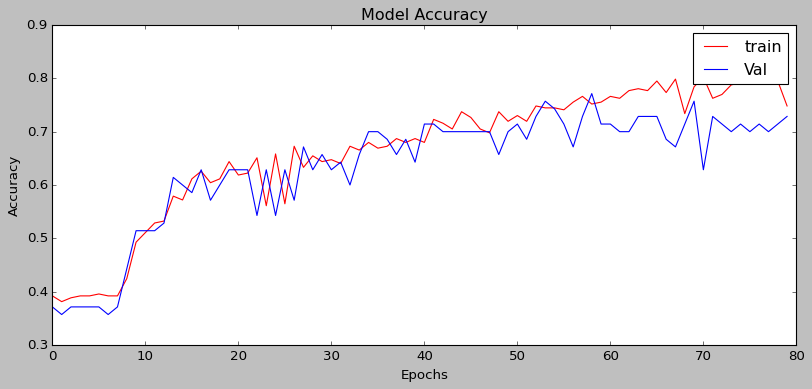

In [16]:
# plot training history
plt.style.use('classic')
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], c = 'r')
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'Val'])

In [26]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print('Accuracy over test set: ',round((score[1]*100), 2),"%" )

2/2 [==============================] - 1s 42ms/step - loss: 2.4708 - accuracy: 0.8571
Accuracy over test set:  85.71 %


Actual Breed:  maltese_dog
Predicted Breed:  maltese_dog


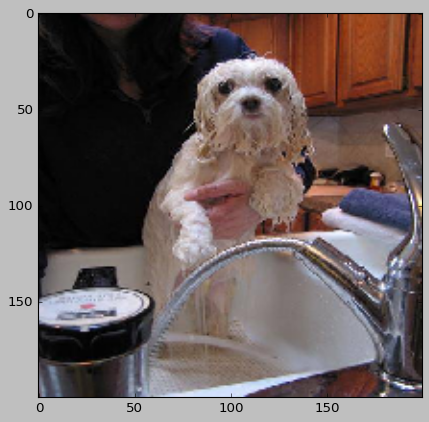

In [22]:
n = 25
plt.imshow(X_test[n,:,:,:])

print("Actual Breed: ", labels['breed'][np.argmax(y_test[n])])
print("Predicted Breed: ", labels['breed'][np.argmax(y_pred[n])])

1/1 [==============================] - 0s 55ms/step
Predicted Breed:  scottish_deerhound


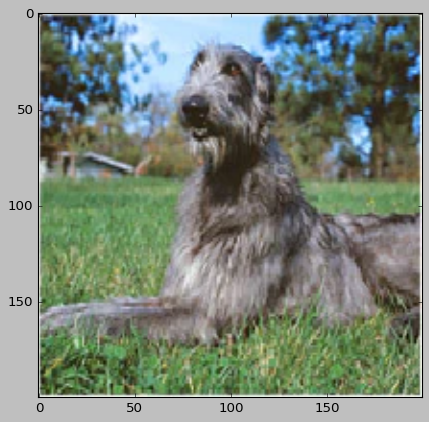

In [19]:
test_image = image.load_img('7.webp', target_size = (200, 200))
plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print("Predicted Breed: ", labels['breed'][np.argmax(result)]);

In [29]:
model.save("dogbreed.h5")